# Clase Práctica 1: Clasificación y Regresión 📈


----------------------------------

En el aprendizaje de máquinas, la tarea de clasificación consiste en predecir una variable discreta (conjunto finito) a partir de una observación. La principal diferencia con los problemas de regresión, es que en estos últimos los modelos predicen una variable continua (conjunto infinito) a partir de los datos entrada. Un ejemplo de un problema de regresión sería a partir de las características de una casa (tamaño, ubicación, material) predecir su precio. Por otro lado, un ejemplo clásico de clasificación es predecir si un correo es un spam o no. En este caso, como el número de respuestas posibles es finito e igual a 2, se dice que es un problema de clasificación binaria. 

## Objetivos de la clase 📚

El objetivo principal de esta primera clase es realizar una introducción práctica a las tareas de clasificación y regresión en el aprendizaje de máquinas. Para esto, primero implementaremos varios modelos de clasificación para poder relacionar las características fisiológicas de pacientes con la presencia de una enfermedad cardiovascular 🩺. Luego, veremos un ejemplo de cómo resolver un problema de regresión para predecir el sueldo de los jugadores de futbol a partir de sus características ⚽.

Las principales librerías que vamos a utilizar son las siguientes:

- Pandas 🐼
- Scikit-learn
- Numpy
- Matplotlib

## Metodología

La mayoría de los problemas que se resuelven en el aprendizaje de máquinas pueden ser abordados siguiendo 3 pasos principales:

1. Exploración de datos.
2. Selección de modelos.
3. Comparación y análisis de resultados.

A pesar de que en aplicaciones reales existen muchos más pasos intermedios, como el estudio del problema a nivel de negocio y la puesta en producción, estos pasos serán suficientes para abordar los distintos problemas que veremos en este curso.

Así que empecemos! 🥳


## **Clasificación**

**Exploración de datos 🧐**

En general, cuando se resuelven problemas relacionados al aprendizaje de máquinas solemos trabajar con datos almacenados en formatos de tablas, con extensiones tales como csv, tsv, xlsx o incluso en algunos casos txt (sí, en el mundo real los datos pueden venir poco estructurados). 

*Pandas* 🐼 es una librería de Python especializada en el manejo de estructuras de datos, la cual nos permite poder cargar, procesar y analizar datos tabulados de manera sencilla. Además, nos entrega muchas funciones que en conjunto con otros librerías de visualización como *Matplotlib* o *Seaborn* nos permite obtener excelentes visualizaciones sobre los datos.

**Importar las librerías**

In [ ]:
import pandas as pd # Manejo y análisis de estructuras de datos
import matplotlib.pyplot as plt # Colección de funciones que nos permiten obtener visualizaciones de los datos
import seaborn as sns # Otra librería de visualización de datos

**Lectura del dataset**

Con la función `read_csv` podemos cargar datasets que se encuentren en formato csv. Es importante que el nombre de la variable sea lo más simple posible, ya que en la parte del análisis de los datos se utiliza siempre.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plncmm/biocompu/main/data/cardiovascular_diseases.csv")

La función `head` nos muestra las primeras 5 filas del dataset

In [ ]:
df.head()

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
0,45,0,typical_angina,138,236,0,0,152,1,0.2,0,0,fixed_defect,1
1,61,1,typical_angina,120,260,0,1,140,1,3.6,0,1,reversable_defect,0
2,44,0,non_anginal_pain,108,141,0,1,175,0,0.6,0,0,fixed_defect,1
3,77,1,typical_angina,125,304,0,0,162,1,0.0,-1,3,fixed_defect,0
4,35,1,typical_angina,126,282,0,0,156,1,0.0,-1,0,reversable_defect,0


La función `sample(x)` nos entrega x ejemplos del datasets al azar

In [ ]:
df.sample(3)

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
162,64,0,non_anginal_pain,140,313,0,1,133,0,0.2,-1,0,reversable_defect,1
172,48,1,non_anginal_pain,124,255,1,1,175,0,0.0,-1,2,fixed_defect,1
290,63,0,typical_angina,108,269,0,1,169,1,1.8,0,2,fixed_defect,0


La función `tail` nos muestra las últimas filas del dataset

In [ ]:
df.tail()

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
296,59,0,typical_angina,174,249,0,1,143,1,0.0,0,0,fixed_defect,0
297,52,1,asymptomatic,118,186,0,0,190,0,0.0,0,0,normal,1
298,66,1,typical_angina,120,302,0,0,151,0,0.4,0,0,fixed_defect,1
299,51,1,typical_angina,140,298,0,1,122,1,4.2,0,3,reversable_defect,0
300,57,1,typical_angina,150,276,0,0,112,1,0.6,0,1,normal,0


En aprendizaje de máquinas las filas de un dataset son más conocidas como *instancias*, mientras que las columnas son nuestros *atributos* o *features*. Para acceder al número de instancias y de features utilizamos el atributo `shape`. El primer valor corresponde al número de instancia, mientras que el segundo es el número de atributos.

In [ ]:
df.shape 

(301, 14)

El resultado de la celda anterior nos muestra que hay un total de 301 instancias, donde cada una tiene un total de 14 atributos. Para acceder al nombre de cada uno de estos atributos, utilizamos el comando `columns`.

In [ ]:
df.columns

Index(['age', 'male', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'high_fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression_by_exercise',
       'slope_st_by_excercise_peak',
       'number_of_vessels_colored_by_flouroscopy', 'thalassemia',
       'cardiovascular_disease'],
      dtype='object')

Si queremos información más detallada acerca de estos atributos podemos utilizar la función `info`, la cual nos entrega el nombre, la cantidad de ejemplos no nulos y el tipo de dato de cada columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       301 non-null    int64  
 1   male                                      301 non-null    int64  
 2   chest_pain_type                           301 non-null    object 
 3   resting_blood_pressure                    301 non-null    int64  
 4   cholesterol                               301 non-null    int64  
 5   high_fasting_blood_sugar                  301 non-null    int64  
 6   resting_electrocardiographic_results      301 non-null    int64  
 7   maximum_heart_rate_achieved               301 non-null    int64  
 8   exercise_induced_angina                   301 non-null    int64  
 9   st_depression_by_exercise                 301 non-null    float64
 10  slope_st_by_excercise_peak            

Si queremos obtener estadística acerca de cada una de nuestras columnas utilizamos la función `describe`. Esta función nos entrega la cantidad de datos, el promedio, desviación estandar, mínimo, máximo y cuartiles.

In [ ]:
df.describe()

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,-0.398671,0.734219,0.544850
std,9.110950,0.465534,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.498814
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000,4.000000,1.000000


Un paso fundamental en la exploración de datos es ver que no hayan valores nulos. Para revisar esto de manera rápida, utilizamos la función `isnull`. Esta función analiza celda por celda si existe un valor nulo, en caso que así sea asigna el valor `True`, en caso contrario se coloca el valor `False`.

In [ ]:
df.isnull()

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Luego, podemos utilizar la función `sum`, que nos permite sumar los valores que son `True` en cada columna.

In [ ]:
df.isnull().sum()

age                                         0
male                                        0
chest_pain_type                             0
resting_blood_pressure                      0
cholesterol                                 0
high_fasting_blood_sugar                    0
resting_electrocardiographic_results        0
maximum_heart_rate_achieved                 0
exercise_induced_angina                     0
st_depression_by_exercise                   0
slope_st_by_excercise_peak                  0
number_of_vessels_colored_by_flouroscopy    0
thalassemia                                 0
cardiovascular_disease                      0
dtype: int64

En este caso no tenemos valores nulos, pero si los tuviéramos es importante que sean reemplazados por algún valor. 

Ahora vamos a analizar nuestro **atributo objetivo**. Este atributo corresponde al valor que nos gustaría predecir a partir de los demás atributos (o parte de ellos). En nuestro caso utilizaremos la columna  *cardiovascular_disease*. Accedamos a ella para ver la naturaleza de los datos.

In [ ]:
df["cardiovascular_disease"]

0      1
1      0
2      1
3      0
4      0
      ..
296    0
297    1
298    1
299    0
300    0
Name: cardiovascular_disease, Length: 301, dtype: int64

Al parecer se trata de un atributo con valores 0's y 1's, donde 0 correspondería a que el paciente no presenta enfermedad cardiovascular, mientras que 1 significa que si tiene. Para comprobar esto, utilizamos la función `set` que nos permite ver todos los valores distintos que puede tomar este atributo.

In [ ]:
set(df["cardiovascular_disease"])

{0, 1}

Con este resultados podemos concluir que trabajaremos con una clasificación binaria 👀. Otro paso fundamental, es contar la frecuencia de cada uno de los posibles valores pertenecientes a nuestro atributo/variable objetivo. Esto se realiza con la función `value_counts`.

In [ ]:
df["cardiovascular_disease"].value_counts()

1    164
0    137
Name: cardiovascular_disease, dtype: int64

Podemos ver que los datos están prácticamente balanceados; 164 pacientes presentan una enfermedad cardiovascular, mientras que 137 no tienen. En caso que exista un desbalance, hay que aplicar técnicas especiales de balanceo que veremos más adelante en el curso. Ahora sigamos analizando nuestros datos.

In [ ]:
df.sample(1)

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
128,52,1,atypical_angina,128,205,1,1,184,0,0.0,-1,0,fixed_defect,1


Podemos ver que las columnas *chest_pain_type* y *thalassemia* son atributos con valores de tipo string (palabras). En el aprendizaje de máquinas nuestros algoritmos o sistemas son creados a partir de una serie de operaciones matemáticas sobre los datos, lo cual nos permite entrenar y luego realizar predicciones. Debido a esto, nuestro modelos no pueden trabajar directamente con texto y deben ser transformados a números.

La manera más sencilla de realizar esto es utilizando una transformación **One-Hot**. Esto significa que si tenemos un atributo de tipo string con x valores distintos, crearemos un total de x atributos nuevos con valores binarios. Para ejemplificar, si se tiene una columna con los siguientes valores


| chest_pain_type |
|--------|
| asymptomatic |
| non_anginal_pain   |
| typical_angina|
| atypical_angina |

y se transforma utilizando One-Hot Encoding, se generan las siguientes asignaciones columnas:


| chest_pain_type_asymptomatic | chest_pain_type_non_anginal_pain | chest_pain_type_typical_angina | chest_pain_type_atypical_angina |
|------------------------------|----------------------------------|--------------------------------|---------------------------------|
| 1                            | 0                                | 0                              | 0                               |
| 0                            | 1                                | 0                              | 0                               |
| 0                            | 0                                | 1                              | 0                               |
| 0                            | 0                                | 0                              | 1                               |


Así, ya no tenemos que lidiar con valores no numéricos. Para realizar esta transformación podemos utilizar la función `get_dummies`.

In [ ]:
df = pd.get_dummies(df)
df.sample(3)

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
17,58,1,125,220,0,1,144,0,0.4,0,4,1,0,1,0,0,0,0,1
204,57,1,152,274,0,1,88,1,1.2,0,1,0,0,0,0,1,0,0,1
295,54,1,120,258,0,0,147,0,0.4,0,0,1,0,0,1,0,0,0,1


Los Dataframes de Pandas también nos permiten realizar consultas interesantes sobre nuestro dataset en una linea de código. Por ejemplo, con el siguiente comando consultamos cuántas personas menores a 40 años presentan una enfermedad cardiovascular.

In [ ]:
df[(df["age"] <= 40) & (df["cardiovascular_disease"] == 1)].shape[0]

13

Lo siguiente que podemos hacer, es crear diferentes visualizaciones que nos permitan entender mejor nuestros datos. 

Por ejemplo, si utilizamos la función *box plot* podemos visualizar si es que existen datos alejados del promedio o con un extraño comportamiento en nuestro dataset, más conocidos como outliers.

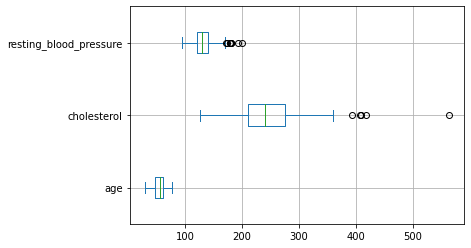

In [ ]:
df[['age', 'cholesterol','resting_blood_pressure']].plot.box(vert = False, grid = True)

También podemos utilizar un scatter plot para ver si dos variables tienen una relación lineal o algún otro comportamiento

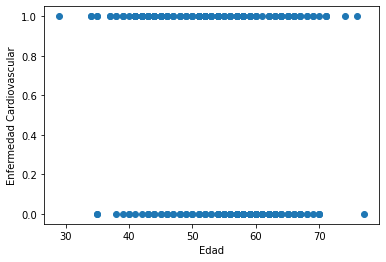

In [ ]:
plt.scatter(df['age'], df['cardiovascular_disease'])
plt.xlabel('Edad')
plt.ylabel('Enfermedad Cardiovascular')
plt.show()

Con la función `corr` visualizamos la matriz de correlación entre nuestros atributos

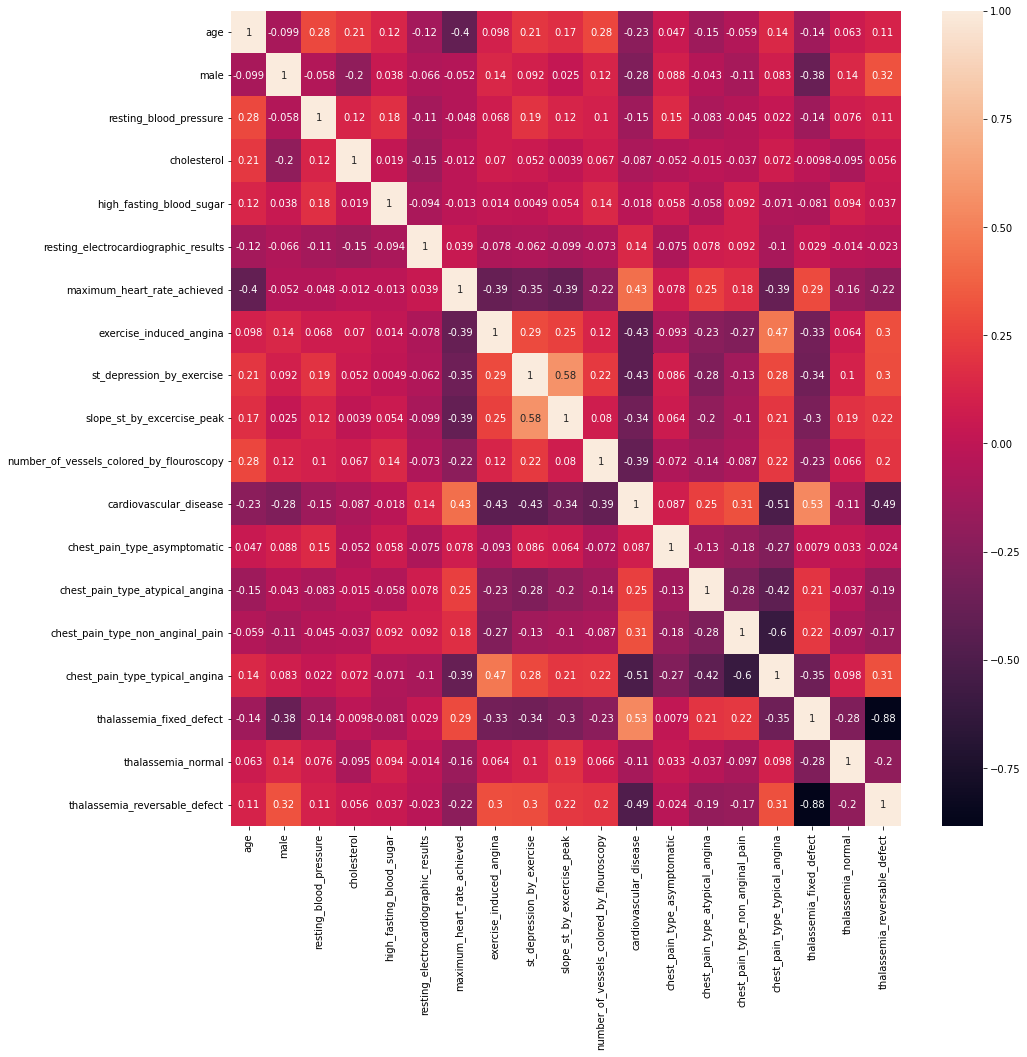

In [ ]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(15,15))
ax = sns.heatmap(df[features].corr(), annot=True)

**Entrenamiento de modelos**

Para poder entrenar nuestros modelos de aprendizaje supervisado debemos separar nuestros datos identificando claramente cuál será nuestra variable objetivo. Así, guardaremos en la variable `X` los atributos de entrada o features, mientras que utilizamos la variable `y` para nuestro atributo objetivo.

In [ ]:
X = df.drop("cardiovascular_disease", axis=1) # Drop elimina la columna que se especifique, y axis = 1 significa eliminar valores de las columnas

In [ ]:
y = df['cardiovascular_disease']

Teniendo esto, ya podemos entrenar modelos sobre nuestros datos 😄. En particular, veremos 3 modelos: Support Vector Machines (SVM), Decision Tree Classifier (DTC), y Randon Forest (RF).


**Support Vector Machine**



In [ ]:
from sklearn.svm import SVC

In [ ]:
logmodel = SVC()
logmodel.fit(X, y)

SVC()

Luego de que el modelo fue entrenado, podemos hacer  predicciones sobre algún conjunto de datos para así analizar el rendimiento de nuestro clasificador. Este proceso se realiza mediante la función `predict`.

In [ ]:
predictions = logmodel.predict(X)

Para evaluar el rendimiento de nuestro modelo utilizamos la función `classification_report`, la cual nos muestra las métricas `accuracy`, `precision`, `recall` y `f1-score`.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y, predictions))

0.6843853820598007


Y listo, hemos entrenado nuestro clasificador y hemos obtenido resultados bastante altos dada la complejidad del problema 🥳 



![Fired!](https://media3.giphy.com/media/3EAYL7KCtZJOJGtli6/giphy.gif?cid=ecf05e47b8ucx71fgr2bny9bn1mf8osjbh2z2grz4c4v4pyd&rid=giphy.gif&ct=g)

El problema es que entrenamos el modelo sobre el conjunto de datos X e y y luego realizamos predicciones sobre el mismo conjunto X original, es decir, estamos no estamos midiendo correctamente el rendimiento del modelo en datos nuevos. 

En otras palabras, supongamos que ustedes son unos estudiantes de primer año. Para poder estudiar para su primer control recolectan los controles realizados en la historia del ramo, y ustedes se aprenden de memoria todas las preguntas y respuestas. Si al momento de rendir la prueba, aparece alguna de esas preguntas, ustedes obtendrán una buena nota ya que saben la respuesta. Sin embargo, si por alguna razón el profesor decide innovar y crea una nueva pregunta, la nota que obtendrán probablemente será mala, ya que no estaban preparados para una nueva pregunta, un nuevo dato.

Eso es lo que ocurre acá, no sabemos si el modelo es capaz de obtener buenos resultados en nuevos datos. Por lo tanto es importante antes de entrenar un modelo dividir nuestros datos en dos conjuntos; entrenamiento y testeo. El primer conjunto nos servirá para entrenar nuestro modelo, mientras que el segundo nos servirá para medir el rendimiento en datos que con alta probabilidad no fueron vistos anteriormente. Esto se llama medir el poder de **generalización** de los modelos, y es uno de los conceptos más importantes en el aprendizaje de máquinas.

Más adelante veremos que en la práctica es mejor dividir el conjunto original en 3 particiones; entrenamiento, validación y testeo. Pero por ahora, nos quedaremos con las dos mencionadas. Para generar estos conjuntos lo hacemos con el siguiente código:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Luego, entrenamos nuestro modelo sobre el conjunto de entrenamiento.

In [ ]:
logmodel = SVC()
logmodel.fit(X_train, Y_train)

SVC()

Obtenemos las predicciones sobre el conjunto de test y el rendimiento.

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,predictions))

0.6703296703296703


Como estamos realizando una regresión, por cada una de las variables tendremos un coeficientes que habrá sido aprendido por el modelo. Entre más grande (de manera absoluta) es dicho número, entonces mayor influencia tiene sobre la variable objetivo (enfermedad cardiovascular). Podemos acceder a los valores de esos coeficientes con el siguiente código:

In [ ]:
svm_vil = pd.DataFrame(logmodel.coef_, columns=df.drop("cardiovascular_disease", axis=1).columns) # Guardamos en un dataframe los coeficientes
svm_vil.index = ["cardiovascular_disease"] # Colocamos como índice los nombres de las especies
svm_vil.transpose().sort_values(by="cardiovascular_disease") # Trasponemos el dataframe

,cardiovascular_disease
chest_pain_type_typical_angina,-1.372148
male,-0.872138
number_of_vessels_colored_by_flouroscopy,-0.819863
thalassemia_reversable_defect,-0.633939
exercise_induced_angina,-0.531352
st_depression_by_exercise,-0.528609
slope_st_by_excercise_peak,-0.217386
high_fasting_blood_sugar,-0.059429
resting_blood_pressure,-0.013517
cholesterol,-0.002513


Ahora que ya sabemos como se entrena un modelo, probemos una serie de modelos de aprendizaje supervisado y veamos cuál es el que obtiene mejor rendimiento.

In [ ]:
models = []
models.append(('LR'   , LogisticRegression()))
models.append(('LDA'  , LinearDiscriminantAnalysis()))
models.append(('KNN'  , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB'   , GaussianNB()))
models.append(('SVM'  , SVC(probability=True)))
models.append(('AB'   , AdaBoostClassifier()))
models.append(('GBM'  , GradientBoostingClassifier()))
models.append(('RF'   , RandomForestClassifier()))   

In [ ]:
for name, model in models:
    print(f'Testing model: {name}\n')
    trained_model = model.fit(X_train, Y_train)
    predictions = trained_model.predict(X_test)
    print(classification_report(Y_test, predictions))

Testing model: LR

              precision    recall  f1-score   support

           0       0.91      0.68      0.78        44
           1       0.76      0.94      0.84        47

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.83      0.81      0.81        91

Testing model: LDA

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        44
           1       0.75      0.91      0.83        47

    accuracy                           0.80        91
   macro avg       0.82      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91

Testing model: KNN

              precision    recall  f1-score   support

           0       0.76      0.57      0.65        44
           1       0.67      0.83      0.74        47

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.70        91
weighted avg   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.91      0.66      0.76        44
           1       0.75      0.94      0.83        47

    accuracy                           0.80        91
   macro avg       0.83      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91

Testing model: RF

              precision    recall  f1-score   support

           0       0.91      0.68      0.78        44
           1       0.76      0.94      0.84        47

    accuracy                           0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.83      0.81      0.81        91



De los resultados podemos ver que el algoritmo que obtuvo mejor rendimiento fue Random Forest y la Regresión Logística.